# IHA1 - Assignment

Welcome to the first individual home assignment!  

This assignment consists of two parts:
 * Build a deep neural network for forward propagation
  
The focus of this assignment is for you to gain practical knowledge with implementing forward propagation of deep neural networks without using any deep learning framework. You will also gain practical knowledge in two of Python's scientific libraries [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/index.html) and [Matplotlib](https://matplotlib.org/devdocs/index.html).  

Skeleton code is provided for most tasks and every part you are expected to implement is marked with **TODO**

We expect you to search and learn by yourself any commands you think are useful for these tasks. Don't limit yourself to only what was taught in CL1. Use the help function, [stackoverflow](https://stackoverflow.com/), google, the [python documentation](https://docs.python.org/3.5/library/index.html) and the [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/index.html) documentation to your advantage.  

**IMPORTANT NOTE**: The tests available are not exhaustive, meaning that if you pass a test you have avoided the most common mistakes, but it is still not guaranteed that you solution is 100% correct.  

Lets start by importing the necessary libraries below

In [598]:
import numpy as np
import matplotlib.pyplot as plt
from utils.tests.iha1Tests import *

## 2 Building your deep neural network
It is time to start implementing your first feed-forward neural network. In this lab you will only focus on implementing the forward propagation procedure.  

When using a neural network, you can not forward propagate the entire dataset at once. Therefore, you divide the dataset into a number of sets/parts called batches. A batch will make up for the first dimension of every input to a layer and the notation `(BATCH_SIZE, NUM_FEATURES)` simply means the dimension of a batch of samples where every sample has `NUM_FEATURES` features

### 2.1 activation functions
You will start by defining a few activation functions that are later needed by the neural network.

#### 2.1.1 ReLU
The neural network will use the ReLU activation function in every layer except for the last. ReLU does element-wise comparison of the input matrix. For example, if the input is `X`, and `X[i,j] == 2` and `X[k,l] == -1`, then after applying ReLU, `X[i,j] == 2` and `X[k,l] == 0` should be true.  

The formula for implementing ReLU for a single neuron $i$ is:
\begin{equation}
relu(z_i) = 
    \begin{cases}
      0, & \text{if}\ z_i \leq 0 \\
      z_i, & \text{otherwise}
    \end{cases}
\end{equation}

Now implement `relu` in vectorized form

In [623]:
def relu(z):
    """ Implement the ReLU activation function
    
    Arguments:
    z - the input of the activation function. Has a type of `numpy.ndarray`
    
    Returns:
    a - the output of the activation function. Has a type of numpy.ndarray and the same shape as `z`
    """
    
    a = z*(z>0) # TODO
    
    return a

In [624]:
# test case
test_relu(relu)

Test passed


#### 2.1.2 Sigmoid
The sigmoid activation function is common for binary classification. This is because it squashes its input to the range [0,1].  
Implement the activation function `sigmoid` using the formula:  
\begin{equation}
    \sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

In [625]:
def sigmoid(z):
    """ Implement the sigmoid activation function
    
    Arguments:
    z - the input of the activation function. Has a type of `numpy.ndarray`
    
    Returns:
    a - the output of the activation function. Has a type of `numpy.ndarray` and the same shape as `z`
    """
    
    a = 1/ (1+ np.exp(-z)); # TODO
    
    return a

In [626]:
# test case
test_sigmoid(sigmoid)

Test passed


#### 2.1.3 Visualization
Make a plot using matplotlib to visualize the activation functions between the input interval [-3,3]. The plot should have the following properties
 * one plot should contain a visualization of both `ReLU` and `sigmoid`
 * x-axis: range of values between [-3,3], **hint**: np.linspace
 * y-axis: the value of the activation functions at a given input `x`
 * a legend explaining which line represents which activation function

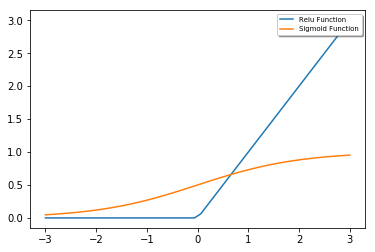

In [627]:
# TODO: make a plot of ReLU and sigmoid values in the interval [-3,3]
x_axis = np.linspace(-3,3);
y_relu = relu(x_axis);
y_sigmoid = sigmoid(x_axis);
plt.plot(x_axis,y_relu,label='Relu Function');
plt.plot(x_axis,y_sigmoid,label='Sigmoid Function');
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')

In [628]:
# sample output from cell above for reference

#### 2.1.4 Softmax
You will use the softmax activation function / classifier as the final layer of your neural network later in the assignment. Implement `softmax` according the the formula below. The subtraction of the maximum value is there solely to avoid overflows in a practical implementation.
\begin{equation}
softmax(z_i) = \frac{e^{z_i - max(\mathbf{z})}}{ \sum^j e^{z_j - max(\mathbf{z})}}
\end{equation}


In [629]:
def softmax(z):
    """ Implement the softmax activation function
    
    Arguments:
    z - the input of the activation function, shape (BATCH_SIZE, FEATURES) and type `numpy.ndarray`
    
    Returns:
    a - the output of the activation function, shape (BATCH_SIZE, FEATURES) and type umpy.ndarray
    """
    
    num = np.exp(z) #/ np.exp(max(z));
    den = np.sum(num,axis=1,keepdims=True);
    a = np.divide(num,den); # TODO
    
    return a

In [630]:
# test case
test_softmax(softmax)

Test passed


### 2.2 Initialize weights
You will implement a helper function that takes the shape of a layer as input, and returns an initialized weight matrix $\mathbf{W}$ and bias vector $\mathbf{b}$ as output. $\mathbf{W}$ should be sampled from a normal distribution of mean 0 and standard deviation 2, and $\mathbf{b}$ should be initialized to all zeros.

In [631]:
def initialize_weights(layer_shape):
    """ Implement initialization of the weight matrix and biases
    
    Arguments:
    layer_shape - a tuple of length 2, type (int, int), that determines the dimensions of the weight matrix: (input_dim, output_dim)
    
    Returns:
    w - a weight matrix with dimensions of `layer_shape`, (input_dim, output_dim), that is normally distributed with
        properties mu = 0, stddev = 2. Has a type of `numpy.ndarray`
    b - a vector of initialized biases with shape (1,output_dim), all of value zero. Has a type of `numpy.ndarray`
    """
    w = np.random.normal(loc=0.0, scale=2.0, size=layer_shape) #None # TODO
    b = np.zeros((1,layer_shape[1]))
    
    return w, b

In [632]:
# test case
test_initialize_weights(initialize_weights)

Test passed


### 2.3 Feed-forward neural network layer module
To build a feed-forward neural network of arbitrary depth you are going to define a neural network layer as a module that can be used to stack upon eachother.  

Your task is to complete the `Layer` class by following the descriptions in the comments.  

Recall the formula for forward propagation of an arbitrary layer $l$:

\begin{equation}
\mathbf{a}^{[l]} = g(\mathbf{z}^{[l]}) = g(\mathbf{a}^{[l-1]}\mathbf{w}^{[l]} +\mathbf{b}^{[l]})
\end{equation}

$g$ is the activation function given by `activation_fn`, which can be relu, sigmoid or softmax. 

In [633]:
class Layer:
    """ 
    TODO: Build a class called Layer that satisfies the descriptions of the methods
    Make sure to utilize the helper functions you implemented before
    """
    
    def __init__(self, input_dim, output_dim, activation_fn=relu):
        """
        Arguments:
        input_dim - the number of inputs of the layer. type int
        output_dim - the number of outputs of the layer. type int
        activation_fn - a reference to the activation function to use. Should be `relu` as a default
                        possible values are the `relu`, `sigmoid` and `softmax` functions you implemented earlier.
                        Has the type `function`
        
        Attributes:
        w - the weight matrix of the layer, should be initialized with `initialize_weights`
            and has the shape (INPUT_FEATURES, OUTPUT_FEATURES) and type `numpy.ndarray`
        b - the bias vector of the layer, should be initialized with `initialize_weights`
            and has the shape (1, OUTPUT_FEATURES) and type `numpy.ndarray`
        activation_fn - a reference to the activation function to use.
                        Has the type `function`
        """
        self.w, self.b = initialize_weights((input_dim,output_dim));
        self.activation_fn = activation_fn; # TODO
        
    def forward_prop(self, a_prev):
        """ Implement the forward propagation module of the neural network layer
        Should use whatever activation function that `activation_fn` references to
        
        Arguments:
        a_prev - the input to the layer, which may be the data `X`, or the output from the previous layer.
            a_prev has the shape of (BATCH_SIZE, INPUT_FEATURES) and the type `numpy.ndarray`
        
        Returns:
        a - the output of the layer when performing forward propagation. Has the type `numpy.ndarray`
        """
        
        a = self.activation_fn(np.matmul(a_prev,self.w) + self.b) # TODO
        
        return a

In [634]:
# test case, be sure that you pass the previous activation function tests before running this test
test_layer(Layer, relu, sigmoid, softmax)

Test passed


### 2.4 Logistic regression 
Binary logistic regression is a classifier where classification is performed by applying the sigmoid activation function to a linear combination of input values. You will now try out your neural network layer by utilizing it as a linear combination of input values and apply the sigmoid activation function to classify a simple problem. 

The cell below defines a dataset of 5 points of either class `0` or class `1`. Your assignment is to:  
1. Create an instance of a `Layer` with sigmoid activation function  
2. Manually tune the weights `w` and `b` of your layer

You can use `test_logistic` to visually inspect how your classifier is performing.

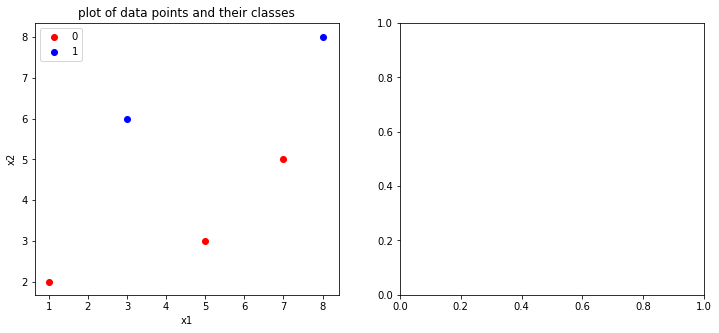

In [635]:
# Run this cell to create the dataset
X_s = np.array([[1, 2],
               [5, 3],
               [8, 8],
               [7, 5],
               [3, 6]])
Y_s = np.array([0,0,1,0,1])

test_logistic(X_s, Y_s)

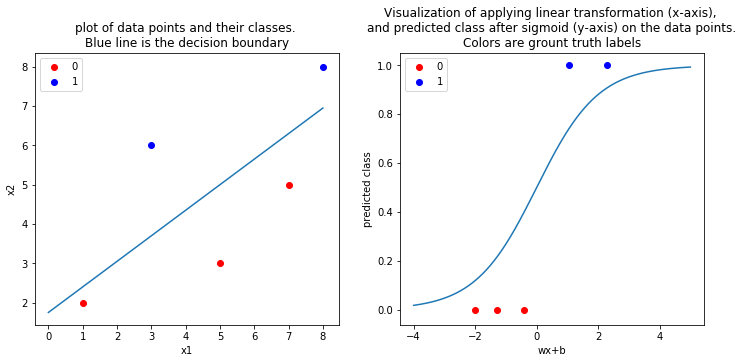

test passed!


In [636]:
# create an instance of layer
l = Layer(2,1,sigmoid)

# TODO: manually tune weights
l.w = np.array([[-0.65],[1.]])
l.b = -1.75

# testing your choice of weights with this function
test_logistic(X_s,Y_s,l,sigmoid)

In [637]:
# sample output from cell above for reference

### 2.5 Feed-forward neural network
Now define the actual neural network class. It is an L-layer neural network, meaning that the number of layers and neurons in each layer is specified as input by the user. Once again, you will only focus on implementing the forward propagation part.

Read the descriptions in the comments and complete the todos  

In [638]:
class NeuralNetwork:
    """ 
    TODO: Implement an L-layer neural network class by utilizing the Layer module defined above 
    Each layer should use `relu` activation function, except for the output layer, which should use `softmax`
    """
    
    def __init__(self, input_n, layer_dims):
        """
        Arguments:
        input_n    - the number of inputs to the network. Should be the same as the length of a data sample
                     Has type int
        layer_dims - a python list or tuple of the number of neurons in each layer. Layer `l` should have a weight matrix  
                     with the shape (`layer_dims[l-1]`, `layer_dims[l]`). 
                     `layer_dims[-1]` is the dimension of the output layer.
                     Layer 1 should have the dimensions (`input_n`, `layer_dims[0]`).
                     len(layer_dims) is the depth of the neural network
        Attributes:
        input_n - the number of inputs to the network. Has type int
        layers  - a python list of each layer in the network. Each layer should use the `relu` activation function,
                  except for the last layer, which should use `softmax`. 
                  Has type `list` containing layers of type `Layer`
        """
        self.input_n = input_n 
        self.layers = []
        
        
        l =len(layer_dims)
        
        for j in range(0,l):
            
            if j==0:
                self.layers.append(Layer(input_n,layer_dims[0]))
            elif j==l-1:
                
                self.layers.append(Layer(layer_dims[j-1],layer_dims[j],softmax))
            else:
                self.layers.append(Layer(layer_dims[j-1],layer_dims[j]))
                
        
    def forward_prop(self, x):
        """ 
        Implement the forward propagation procedure through the entire network, from input to output.
        You will now connect each layer's forward propagation function into a chain of layer-wise forward propagations.
        
        Arguments:
        x - the input data, which has the shape (BATCH_SIZE, NUM_FEATURES) and type `numpy.ndarray`
        
        Returns:
        a - the output of the last layer after forward propagating through the every layer in `layers`.
            Should have the dimension (BATCH_SIZE, layers[-1].w.shape[1]) and type `numpy.ndarray`
        """
        a = x;
        for layer in self.layers:
               a = layer.forward_prop(a);    
        return a
                                           

In [639]:
# test case
test_neuralnetwork(NeuralNetwork)

Test passed


## 3 Making predictions with a neural network
In practice, its common to load weights to your neural network that has already been trained.  
In this section, you will create an instance of your neural network, load trained weights from disk, and perform predictions.

### 3.1 Load weights from disk
Create an instance of `NeuralNetwork` with input size $28 \times 28 = 784$, two hidden layers of size 100 and an output layer of size 10. Thereafter, load the weights contained in `./utils/ann_weights.npz` to your network.

In [640]:
ann = NeuralNetwork(784,[100,100,10]) # TODO: create instance of ann

# load weights
weights = np.load('./utils/ann_weights.npz')
for l in range(len(ann.layers)):
    ann.layers[l].w = weights['w' + str(l)]
    ann.layers[l].b = weights['b' + str(l)]

### 3.2 Prediction
Now, implement the function `predict_and_correct` which does the following:
1. Load `./utils/test_data.npz` from disk
2. Extract test data `X` and `Y` from file
2. Perform for every pair of data:  
    a. plot the image `x`  
    b. make a prediction using your neural network by forward propagating and picking the most probable class  
    c. check wether the prediction is correct (compare with the ground truth number `y`)   
    d. print the predicted label and wether it was correct or not 

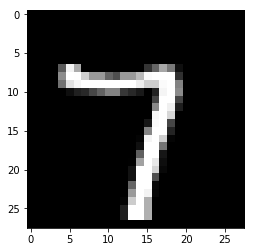

The prediction was 7, it was correct!


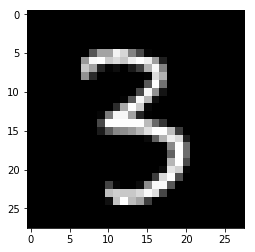

The prediction was 3, it was correct!


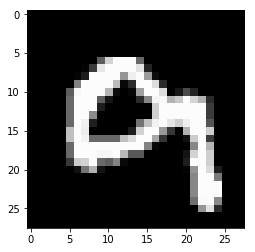

The prediction was 9, it was correct!


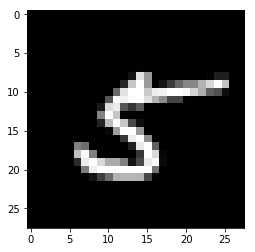

The prediction was 5, it was correct!


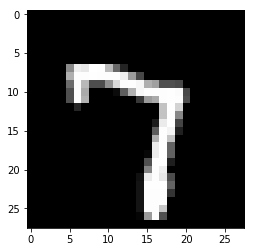

The prediction was 7, it was correct!


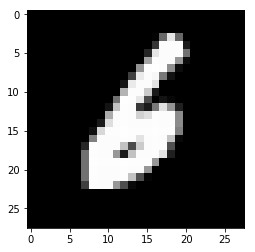

The prediction was 6, it was correct!


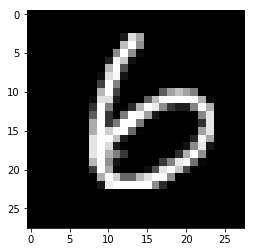

The prediction was 6, it was correct!


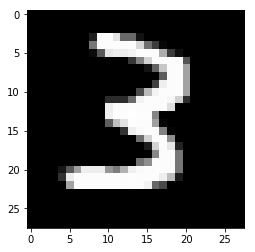

The prediction was 3, it was correct!


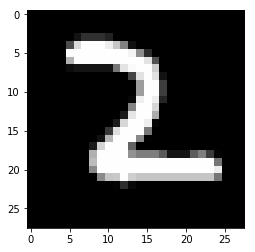

The prediction was 2, it was correct!


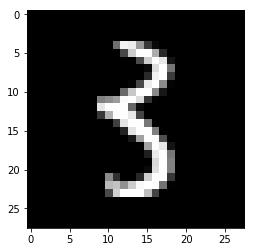

The prediction was 1, it was incorrect!


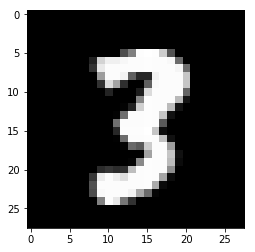

The prediction was 3, it was correct!


In [641]:
def predict_and_correct(ann):
    """ Load test data from file and predict using your neural network. 
    Make a prediction for ever data sample and print it along with wether it was a correct prediction or not
    
    Arguments:
    ann - the neural network to use for prediction. Has type `NeuralNetwork`
    
    Returns: # for test case purposes
    A `numpy.ndarray` of predicted classes (integers [0-9]) with shape (11,)
    """
    data = np.load('./utils/test_data.npz')
    X, cls = data['X'], data['Y']
    
    cls_preds = np.arange(X.shape[0]);
    for i in range(0,X.shape[0]):
        cls_preds[i] = np.argmax(ann.forward_prop(X[i]))
    #print(cls_preds.shape) # TODO: make a predicted number for every image in X
    
    for i in range(len(X)):
        plt.imshow(X[i].reshape(28,28), cmap='gray')
        plt.show()
        correct = cls_preds[i] == cls[i]
        print('The prediction was {0}, it was {1}!'.format(cls_preds[i], 'correct' if correct else 'incorrect'))
        
    return cls_preds
        
cls_pred = predict_and_correct(ann)

In [642]:
# final test case
test_predict_and_correct_answer(cls_pred)

Test passed, you have implemented your neural network correctly!


In [597]:
# sample output from cell above for reference

## Congratulations!
You have successfully implemented a neural network from scratch using only NumPy!  